In [106]:
import pandas as pd
import numpy as np
import sklearn
import pickle 
import time 
import datetime
import warnings
warnings.filterwarnings('ignore')

In [107]:
%run ~/Dropbox/GNNpaper/posts/function_proposed_gcn.py

In [108]:
with open('./fraudTrain.pkl', 'rb') as file:
    fraudTrain = pickle.load(file)    

In [109]:
merged_df = pd.read_csv('./240411_meged.csv')
merged_df = merged_df[merged_df['model'] != 'WeightedEnsemble_L2']
merged_df = merged_df[merged_df['pre'] != 0]
merged_df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])

In [110]:
merged_df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
0,ECOD,0.003704,0.591404,0.003553,0.843750,0.007076,0.717359,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
1,GMM,0.082634,0.692003,0.003410,0.609375,0.006782,0.650760,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
2,HBOS,0.002123,0.936368,0.020868,0.781250,0.040650,0.858943,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
3,IForest,0.144727,0.815358,0.007263,0.781250,0.014393,0.798334,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
4,INNE,0.326223,0.766636,0.005070,0.687500,0.010065,0.727136,False,pyod,0.097074,10010,['amt'],0.450350,37088,0.001726,NaN,NaN,NaN,0.448624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12819,RandomForestEntr,NaN,0.994032,0.092308,0.206897,0.127660,0.761099,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN,0.006976
12821,ExtraTreesGini,NaN,0.994687,0.120690,0.241379,0.160920,0.763472,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN,0.006976
12822,ExtraTreesEntr,NaN,0.994760,0.122807,0.241379,0.162791,0.763820,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN,0.006976
12824,XGBoost,NaN,0.996580,0.178571,0.172414,0.175439,0.939455,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN,0.006976


# ex1. tr:0.5, tst: 0.001

In [111]:
ex1 = merged_df[(merged_df['train_size'] == 9009) & (merged_df['test_size']>=50000) & (merged_df['test_size'] < 60000)]

In [112]:
ex1.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
10486,GCN,NaN,0.918906,0.015439,0.942857,0.030380,0.974102,True,Proposed,0.075671,9009,amt,0.504274,51952,0.001347,NaN,10000000.0,0.8,0.502926
1317,XGBoost,NaN,0.898273,0.009386,0.862069,0.018570,0.958326,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
6192,XGBoost,NaN,0.898273,0.009386,0.862069,0.018570,0.958326,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
7897,XGBoost,NaN,0.898273,0.009386,0.862069,0.018570,0.958326,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
3218,XGBoost,NaN,0.898273,0.009386,0.862069,0.018570,0.958326,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3404,LOF,0.021080,0.426190,0.001275,0.500000,0.002543,0.463041,False,pyod,0.074713,9009,['amt'],0.497058,51944,0.001463,NaN,NaN,NaN,0.495595
1712,ROD,2.247799,0.499673,0.000732,0.287879,0.001460,0.393910,False,pyod,0.074137,9009,['amt'],0.494283,51946,0.001271,NaN,NaN,NaN,0.493013
3408,ROD,1.398115,0.499057,0.000462,0.157895,0.000921,0.328726,False,pyod,0.074713,9009,['amt'],0.497058,51944,0.001463,NaN,NaN,NaN,0.495595
1711,PCA,0.002998,0.235533,0.000479,0.287879,0.000956,0.261673,False,pyod,0.074137,9009,['amt'],0.494283,51946,0.001271,NaN,NaN,NaN,0.493013


In [113]:
ex1.drop_duplicates(inplace=True)


In [114]:
ex1

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
363,KNeighborsUnif,NaN,0.875715,0.007542,0.844828,0.014950,0.929305,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
364,KNeighborsDist,NaN,0.870383,0.006651,0.775862,0.013189,0.884344,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
365,LightGBMXT,NaN,0.886128,0.008392,0.862069,0.016622,0.952711,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
366,LightGBM,NaN,0.900814,0.009625,0.862069,0.019037,0.953027,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
367,RandomForestGini,NaN,0.851481,0.005808,0.775862,0.011530,0.913896,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
368,RandomForestEntr,NaN,0.851481,0.005808,0.775862,0.011530,0.913896,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
369,CatBoost,NaN,0.894000,0.009011,0.862069,0.017835,0.953981,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
370,ExtraTreesGini,NaN,0.860874,0.006198,0.775862,0.012298,0.923907,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
371,ExtraTreesEntr,NaN,0.858911,0.006247,0.793103,0.012396,0.918441,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713
372,NeuralNetFastAI,NaN,0.964391,0.023404,0.758621,0.045408,0.879963,False,Auto_not_best,0.075408,9009,['amt'],0.503830,51953,0.001116,NaN,NaN,NaN,0.502713


In [115]:
def max_auc_df(df):
    filtered_df = df[(df['pre'] != 0) & (df['rec'] != 0) & (df['f1'] != 0)]
    max_auc_df = filtered_df.groupby('model')['auc'].max().reset_index()
    filtered_df = pd.merge(filtered_df, max_auc_df, how='inner', on=['model', 'auc'])
    max_auc_df = filtered_df.sort_values(by='auc', ascending=False)
    return max_auc_df

In [116]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
def plot_auc_curve(df):
    filtered_df = df[(df['pre'] != 0) & (df['rec'] != 0) & (df['f1'] != 0)]
    max_auc_df = filtered_df.groupby('model')['auc'].max().reset_index()
    filtered_df = pd.merge(filtered_df, max_auc_df, how='inner', on=['model', 'auc'])
    max_auc_df = filtered_df.sort_values(by='auc', ascending=False)

    fig = px.bar(max_auc_df, x='model', y='auc',
                 hover_data=['throw_rate', 'train_frate', 'train_size', 'test_frate', 'test_size'],
                 labels={'auc': 'AUC', 'model': 'Model'},
                 title='AUC Value for Models',
                 color='model')

    fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

    fig.update_layout(
        xaxis=dict(tickangle=45),
        hovermode='closest',
    )

    
    fig.show()

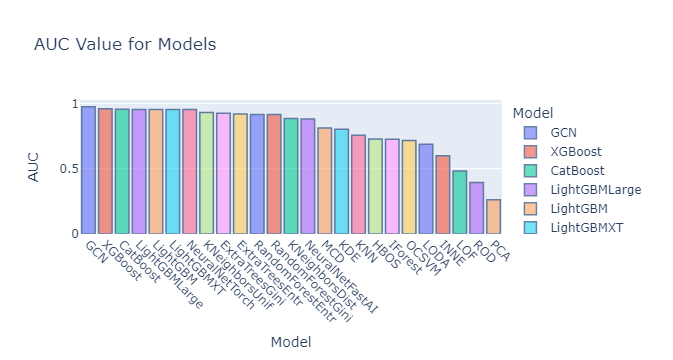

In [117]:
plot_auc_curve(ex1)

# ex2. tr:0.4, tst:0.005

In [118]:
ex2 = merged_df[(merged_df['train_size'] == 14014) & (merged_df['test_size']==6006) & (merged_df['test_frate'] !=0.05)]
ex2.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
5899,GCN,NaN,0.972694,0.143617,0.9,0.247706,0.987316,True,Proposed,0.3,14014,amt,0.426431,6006,0.005000,NaN,135280.0,0.3,0.421431
5901,GCN,NaN,0.973193,0.145946,0.9,0.251163,0.987221,True,Proposed,0.3,14014,amt,0.426431,6006,0.005000,NaN,155280.0,0.3,0.421431
5900,GCN,NaN,0.973693,0.148352,0.9,0.254717,0.987143,True,Proposed,0.3,14014,amt,0.426431,6006,0.005000,NaN,145280.0,0.3,0.421431
5902,GCN,NaN,0.969697,0.131068,0.9,0.228814,0.986998,True,Proposed,0.3,14014,amt,0.426431,6006,0.005000,NaN,165280.0,0.3,0.421431
5903,GCN,NaN,0.972194,0.141361,0.9,0.244344,0.986825,True,Proposed,0.3,14014,amt,0.426431,6006,0.005000,NaN,175280.0,0.3,0.421431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,PCA,0.002804,0.419414,0.000866,0.1,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436
8078,PCA,0.003726,0.419414,0.000866,0.1,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436
1524,PCA,0.002498,0.419414,0.000866,0.1,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436
7812,PCA,0.003347,0.419414,0.000866,0.1,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436


# ex3. tr:0.26, tst:0.005

In [119]:
ex3 = merged_df[(merged_df['train_size'] == 21021) & (merged_df['test_frate'] <= 0.05) & (merged_df['test_frate'] >= 0.04)]
ex3.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
5890,GCN,NaN,0.977689,0.709949,0.935556,0.807287,0.990954,True,Proposed,0.2,21021,amt,0.264307,9009,0.05000,NaN,145280.0,0.3,0.214307
5891,GCN,NaN,0.977356,0.699029,0.960000,0.808989,0.990922,True,Proposed,0.2,21021,amt,0.264307,9009,0.05000,NaN,155280.0,0.3,0.214307
5889,GCN,NaN,0.976912,0.696429,0.953333,0.804878,0.990892,True,Proposed,0.2,21021,amt,0.264307,9009,0.05000,NaN,135280.0,0.3,0.214307
5892,GCN,NaN,0.976912,0.699670,0.942222,0.803030,0.990838,True,Proposed,0.2,21021,amt,0.264307,9009,0.05000,NaN,165280.0,0.3,0.214307
5893,GCN,NaN,0.974803,0.673406,0.962222,0.792315,0.990807,True,Proposed,0.2,21021,amt,0.264307,9009,0.05000,NaN,175280.0,0.3,0.214307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,ROD,2.968383,0.688534,0.017609,0.095556,0.029737,0.407633,False,pyod,0.2,21021,['amt'],0.264307,9009,0.04995,NaN,NaN,NaN,0.214357
10410,ROD,3.948951,0.688534,0.017609,0.095556,0.029737,0.407633,False,pyod,0.2,21021,['amt'],0.264307,9009,0.04995,NaN,NaN,NaN,0.214357
9914,ROD,4.312599,0.688534,0.017609,0.095556,0.029737,0.407633,False,pyod,0.2,21021,['amt'],0.264307,9009,0.04995,NaN,NaN,NaN,0.214357
4654,ROD,4.168068,0.688534,0.017609,0.095556,0.029737,0.407633,False,pyod,0.2,21021,['amt'],0.264307,9009,0.04995,NaN,NaN,NaN,0.214357


# ex4. tr:0.28, tst:0.005

In [120]:
ex4 = merged_df[(merged_df['train_size'] == 21021) & (merged_df['test_frate'] <= 0.005) & (merged_df['test_frate'] >= 0.004)]
ex4.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
8643,GCN,NaN,0.974026,0.151292,0.911111,0.259494,0.988520,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,135280.0,0.3,0.278574
8644,GCN,NaN,0.976690,0.165992,0.911111,0.280822,0.988331,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,145280.0,0.3,0.278574
8645,GCN,NaN,0.977023,0.168033,0.911111,0.283737,0.988294,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,155280.0,0.3,0.278574
8646,GCN,NaN,0.977467,0.170833,0.911111,0.287719,0.988234,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,165280.0,0.3,0.278574
8647,GCN,NaN,0.977245,0.166667,0.888889,0.280702,0.988103,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,175280.0,0.3,0.278574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,ROD,5.488021,0.744145,0.000442,0.022222,0.000867,0.384996,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579
6622,ROD,3.808245,0.744145,0.000442,0.022222,0.000867,0.384996,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579
6637,ROD,5.004738,0.744145,0.000442,0.022222,0.000867,0.384996,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579
8624,ROD,3.712778,0.744145,0.000442,0.022222,0.000867,0.384996,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579


# ex5

In [133]:
ex5 = merged_df[(merged_df['test_frate'] <= 0.0058) & (merged_df['test_frate'] >= 0.0049) & (merged_df['diff'] >= 0.0003)]
ex5.drop_duplicates(inplace=True)
ex5.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
8643,GCN,NaN,0.974026,0.151292,0.911111,0.259494,0.988520,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,135280.0,0.3,0.278574
8644,GCN,NaN,0.976690,0.165992,0.911111,0.280822,0.988331,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,145280.0,0.3,0.278574
8645,GCN,NaN,0.977023,0.168033,0.911111,0.283737,0.988294,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,155280.0,0.3,0.278574
8646,GCN,NaN,0.977467,0.170833,0.911111,0.287719,0.988234,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,165280.0,0.3,0.278574
8647,GCN,NaN,0.977245,0.166667,0.888889,0.280702,0.988103,True,Proposed,0.2,21021,amt,0.283574,9009,0.005000,NaN,175280.0,0.3,0.278574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,PCA,0.002804,0.419414,0.000866,0.100000,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436
1524,PCA,0.002498,0.419414,0.000866,0.100000,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436
8078,PCA,0.003726,0.419414,0.000866,0.100000,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436
6014,PCA,0.003628,0.419414,0.000866,0.100000,0.001718,0.260509,False,pyod,0.3,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN,0.421436


In [143]:
gcn_df = ex5[(ex5['model'] == 'GCN') & (ex5['gamma'] == 0.8) & (ex5['theta'] == 1e7)]
non_gcn_df = ex5[ex5['model'] != 'GCN']
ex55 = pd.concat([gcn_df, non_gcn_df], ignore_index=True)

In [144]:
ex55

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
0,GCN,NaN,0.088967,0.005091,1.000000,0.010131,0.684231,True,Proposed,0.7,6006,amt,0.998002,2574,0.005000,NaN,10000000.0,0.8,0.993002
1,GCN,NaN,0.868798,0.036675,1.000000,0.070755,0.972189,True,Proposed,0.6,7007,amt,0.855002,3003,0.005000,NaN,10000000.0,0.8,0.850002
2,GCN,NaN,0.905912,0.050420,1.000000,0.096000,0.972478,True,Proposed,0.5,8409,amt,0.712094,3603,0.005000,NaN,10000000.0,0.8,0.707094
3,GCN,NaN,0.908526,0.046512,0.909091,0.088496,0.969702,True,Proposed,0.4,10511,amt,0.569308,4504,0.005000,NaN,10000000.0,0.8,0.564308
4,GCN,NaN,0.923576,0.055901,0.900000,0.105263,0.969327,True,Proposed,0.3,14014,amt,0.426431,6006,0.005000,NaN,10000000.0,0.8,0.421431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,LOF,0.048290,0.660340,0.004926,0.333333,0.009709,0.497657,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579
917,MCD,0.007908,0.908314,0.042204,0.800000,0.080178,0.854429,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579
918,OCSVM,21.557708,0.902875,0.039911,0.800000,0.076030,0.851696,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579
919,PCA,0.004143,0.669331,0.002037,0.133333,0.004012,0.402677,False,pyod,0.2,21021,['amt'],0.283574,9009,0.004995,NaN,NaN,NaN,0.278579


In [148]:
import plotly.io as pio
def plot_auc_curve(df):
    filtered_df = df[(df['pre'] != 0) & (df['rec'] != 0) & (df['f1'] != 0)]
    max_auc_df = filtered_df.groupby('model')['auc'].max().reset_index()
    filtered_df = pd.merge(filtered_df, max_auc_df, how='inner', on=['model', 'auc'])
    max_auc_df = filtered_df.sort_values(by='auc', ascending=False)

    fig = px.bar(max_auc_df, x='train_frate', y='auc',
                 hover_data=['throw_rate', 'train_frate', 'train_size', 'test_frate', 'test_size'],
                 labels={'auc': 'AUC', 'model': 'Model'},
                 title='AUC Value for Models',
                 color='model')

    fig.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5, opacity=0.6)

    fig.update_layout(
        xaxis=dict(tickangle=45),
        hovermode='closest',
    )

    
    fig.show()

In [153]:
import plotly.graph_objects as go

def plot_merged_df3(merged_df):


    filtered_df = merged_df.sort_values(by=['train_frate', 'model', 'auc'], ascending=[True, True, False]) \
        .drop_duplicates(subset=['train_frate', 'model'])

    label_order = filtered_df.groupby('model')['auc'].max().sort_values(ascending=False).index

    fig = go.Figure()
    for model in label_order:
            group = filtered_df[filtered_df['model'] == model]
            fig.add_trace(go.Scatter(
                x=group['train_frate'],
                y=group['auc'],
                mode='lines+markers',
                name=model
            ))

    fig.update_layout(
        xaxis_title='Fraud transaction rate',
        yaxis_title='AUC',
        xaxis=dict(range=[0.14, 0.7]),
        yaxis=dict(range=[0.92, 1]),
        legend=dict(
            x=1.05,
            y=1,
            traceorder='normal',
            font=dict(
                family='Arial',
                size=12,
                color='black'
            ),
           # bgcolor='LightSteelBlue',
         #   bordercolor='Black',
         #   borderwidth=1
        )
    )

    fig.show()

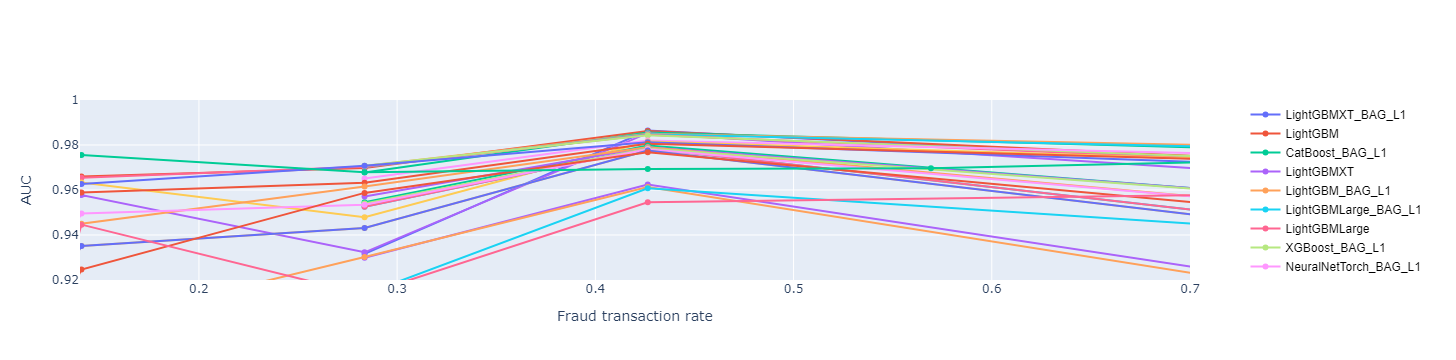

In [154]:
plot_merged_df3(ex55)

> gcn이 맨날 높진 앝ㄶ당 두둥

# ex6

In [155]:
ex6 = merged_df[(merged_df['test_frate'] < 0.002) & (merged_df['test_frate'] >= 0.001) & (merged_df['diff'] >= 0.0003)]
ex6.drop_duplicates(inplace=True)
ex6.sort_values(by='auc', ascending = False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
8345,LightGBMLarge,NaN,0.986219,0.099206,0.833333,0.177305,0.986075,False,Autogluon,0.107023,39284,['amt'],0.152123,16835,0.001782,NaN,NaN,NaN,0.150341
5998,GCN,NaN,0.947098,0.032544,0.970588,0.062977,0.985970,True,Proposed,0.098821,9009,amt,0.498501,37125,0.001832,NaN,11406996.0,0.9,0.496670
8336,LightGBM,NaN,0.986219,0.099206,0.833333,0.177305,0.985903,False,Autogluon,0.107023,39284,['amt'],0.152123,16835,0.001782,NaN,NaN,NaN,0.150341
1180,NeuralNetTorch,NaN,0.982002,0.080000,0.866667,0.146479,0.985676,False,Autogluon,0.107023,39284,['amt'],0.152123,16835,0.001782,NaN,NaN,NaN,0.150341
5953,CatBoost,NaN,0.984634,0.087542,0.812500,0.158055,0.985574,False,Autogluon,0.099945,42066,['amt'],0.142015,18027,0.001775,NaN,NaN,NaN,0.140240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892,PCA,0.003428,0.233595,0.000588,0.265306,0.001173,0.249424,False,pyod,0.119668,9009,['amt'],0.497835,28879,0.001697,NaN,NaN,NaN,0.496139
10660,PCA,0.003260,0.216723,0.000383,0.234940,0.000766,0.225820,False,pyod,0.033507,9009,['amt'],0.498390,129949,0.001277,NaN,NaN,NaN,0.497113
4179,PCA,0.002809,0.219777,0.000355,0.200000,0.000710,0.209902,False,pyod,0.062054,9009,['amt'],0.499611,64975,0.001385,NaN,NaN,NaN,0.498226
3407,PCA,0.003932,0.236793,0.000303,0.157895,0.000605,0.197402,False,pyod,0.074713,9009,['amt'],0.497058,51944,0.001463,NaN,NaN,NaN,0.495595


In [156]:
gcn_df = ex6[(ex6['model'] == 'GCN') & (ex6['gamma'] == 0.8) & (ex6['theta'] == 1e7)]
non_gcn_df = ex6[ex6['model'] != 'GCN']
ex66 = pd.concat([gcn_df, non_gcn_df], ignore_index=True)

In [157]:
ex66

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma,diff
0,GCN,NaN,0.808770,0.007758,0.975000,0.015394,0.958392,True,Proposed,0.146142,5004,amt,0.900080,26089,0.001533,NaN,10000000.0,0.8,0.898547
1,GCN,NaN,0.876793,0.011087,0.972973,0.021924,0.972643,True,Proposed,0.143218,5630,amt,0.799822,26070,0.001419,NaN,10000000.0,0.8,0.798403
2,GCN,NaN,0.905148,0.015544,0.975000,0.030600,0.952527,True,Proposed,0.140461,6435,amt,0.702875,26051,0.001535,NaN,10000000.0,0.8,0.701339
3,GCN,NaN,0.907249,0.018308,1.000000,0.035957,0.968529,True,Proposed,0.135638,7507,amt,0.599707,26016,0.001730,NaN,10000000.0,0.8,0.597977
4,GCN,NaN,0.933698,0.018296,0.941176,0.035895,0.970539,True,Proposed,0.122217,11261,amt,0.400586,25927,0.001311,NaN,10000000.0,0.8,0.399275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,OCSVM,4.652213,0.754870,0.004325,0.704082,0.008598,0.729514,False,pyod,0.033481,10010,['amt'],0.448152,129829,0.001510,NaN,NaN,NaN,0.446642
795,PCA,0.002185,0.372321,0.000749,0.311224,0.001495,0.341819,False,pyod,0.033481,10010,['amt'],0.448152,129829,0.001510,NaN,NaN,NaN,0.446642
796,ROD,1.469945,0.553289,0.000984,0.290816,0.001962,0.422251,False,pyod,0.033481,10010,['amt'],0.448152,129829,0.001510,NaN,NaN,NaN,0.446642
797,NeuralNetTorch,NaN,0.887741,0.011663,0.934783,0.023038,0.967554,False,Auto_not_best,0.062595,9009,['amt'],0.503830,64975,0.001416,NaN,NaN,NaN,0.502414


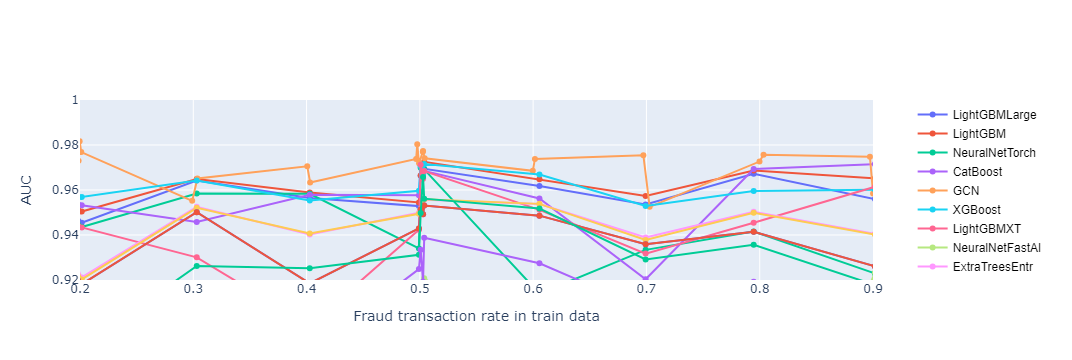

In [162]:
plot_merged_df3(ex66)

그림이 왜이려